# Model Distribution Visualization with JAX

### This notebook visualizes various probability distributions using **JAX** and **Matplotlib**.

In [1]:
!pip install jax seaborn matplotlib --quiet

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
key = jax.random.PRNGKey(42)
num_samples = 10000

### Normal (Gaussian) Distribution

![Normal Formula](https://latex.codecogs.com/png.latex?\color{white}p(x)%20=%20\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}})

- **Parameters:**  
  - Mean (μ)  
  - Standard Deviation (σ)

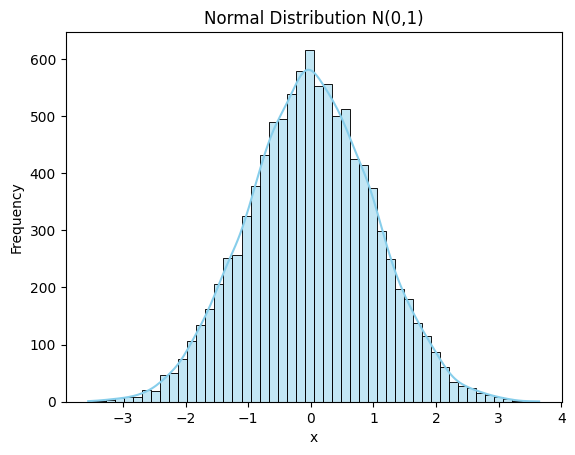

In [4]:
key, subkey = jax.random.split(key)
normal_samples = jax.random.normal(subkey, shape=(num_samples,))  # μ=0, σ=1
sns.histplot(normal_samples, bins=50, kde=True, color='skyblue')
plt.title("Normal Distribution N(0,1)")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()

## Uniform Distribution

![Uniform Formula](https://latex.codecogs.com/png.latex?\color{white}p(x)%20=%20\begin{cases}%20\frac{1}{b-a},%20&%20a%20\le%20x%20\le%20b%20\\%200,%20&%20\text{otherwise}%20\end{cases})

- **Parameters:**  
  - \( a \) = minimum  
  - \( b \) = maximum  


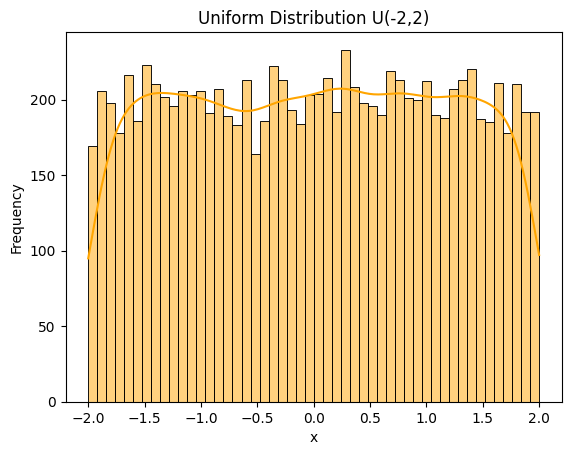

In [5]:
key, subkey = jax.random.split(key)
uniform_samples = jax.random.uniform(subkey, shape=(num_samples,), minval=-2, maxval=2)
sns.histplot(uniform_samples, bins=50, kde=True, color='orange')
plt.title("Uniform Distribution U(-2,2)")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()

### Exponential Distribution

![Exponential Formula](https://latex.codecogs.com/png.latex?\color{white}p(x)%20=%20\lambda%20e^{-\lambda%20x},%20\quad%20x%20\ge%200)

- **Parameter:**  
  - \( \lambda \) = rate


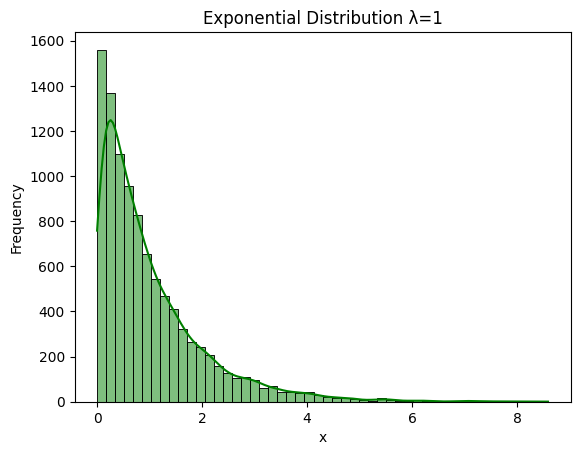

In [6]:
key, subkey = jax.random.split(key)
exponential_samples = jax.random.exponential(subkey, shape=(num_samples,))
sns.histplot(exponential_samples, bins=50, kde=True, color='green')
plt.title("Exponential Distribution λ=1")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()


### Beta Distribution

![Beta Formula](https://latex.codecogs.com/png.latex?\color{white}p(x)%20=%20\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)},%20\quad%200<x<1)

- **Parameters:**  
  - \( \alpha \) = shape 1  
  - \( \beta \) = shape 2  

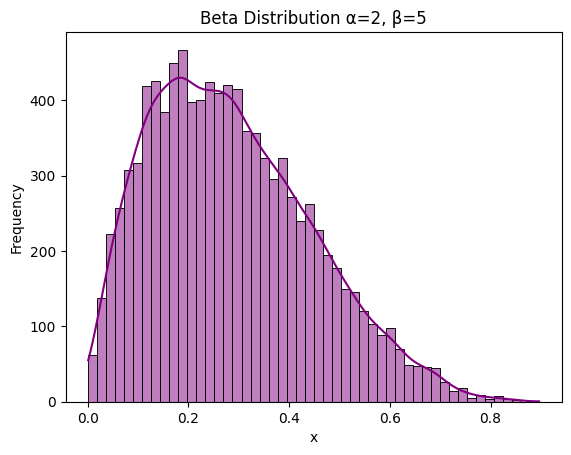

In [7]:
key, subkey = jax.random.split(key)
beta_samples = jax.random.beta(subkey, a=2.0, b=5.0, shape=(num_samples,))
sns.histplot(beta_samples, bins=50, kde=True, color='purple')
plt.title("Beta Distribution α=2, β=5")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()



### Dirichlet Distribution **bold text**

![Dirichlet Formula](https://latex.codecogs.com/png.latex?\color{white}p(\mathbf{x})%20=%20\frac{1}{B(\boldsymbol{\alpha})}%20\prod_{i=1}^K%20x_i^{\alpha_i-1},%20\quad%20\sum_i%20x_i%20=%201)

- **Parameter:**  
  - \( \boldsymbol{\alpha} = [\alpha_1, \alpha_2, ..., \alpha_K] \)



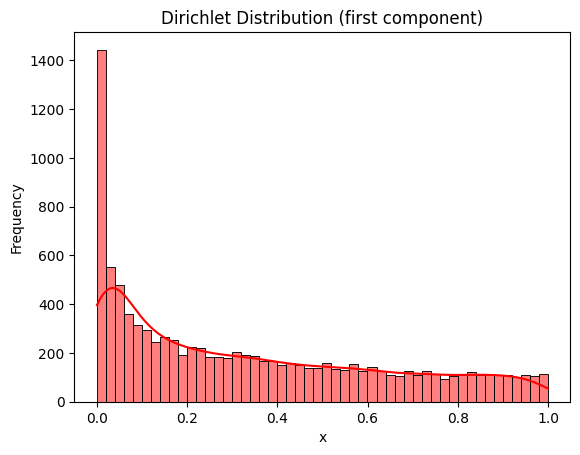

In [8]:
key, subkey = jax.random.split(key)
dirichlet_samples = jax.random.dirichlet(subkey, alpha=jnp.array([0.5,0.5,0.5]), shape=(num_samples,))
sns.histplot(dirichlet_samples[:, 0], bins=50, kde=True, color='red')
plt.title("Dirichlet Distribution (first component)")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.show()


### **Binomial Distribution**

![Binomial Formula](https://latex.codecogs.com/png.latex?\color{white}P(X=k)%20=%20\binom{n}{k}%20p^k%20(1-p)^{n-k},%20\quad%20k=0,1,...,n)

- **Parameters:**  
  - \( n \) = number of trials  
  - \( p \) = probability of success  

---

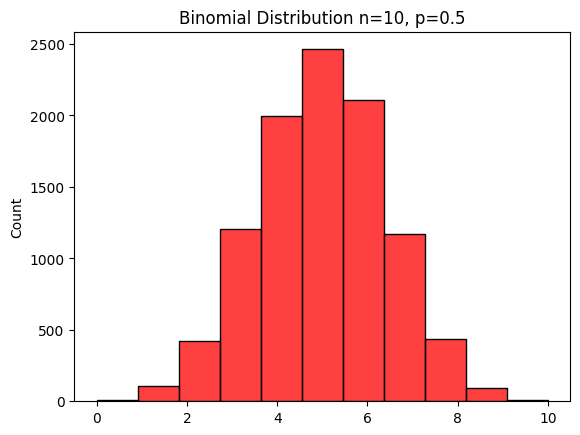

In [9]:
key, subkey = jax.random.split(key)
binomial_samples = jax.random.binomial(subkey, n=10, p=0.5, shape=(num_samples,))
sns.histplot(binomial_samples, bins=11, kde=False, color='red')
plt.title("Binomial Distribution n=10, p=0.5")
plt.show()


### **Poisson Distribution**

![Poisson Formula](https://latex.codecogs.com/png.latex?\color{white}P(X=k)%20=%20\frac{\lambda^k%20e^{-\lambda}}{k!},%20\quad%20k=0,1,2,...)

- **Parameter:**  
  - \( \lambda \) = average rate of events per interval  

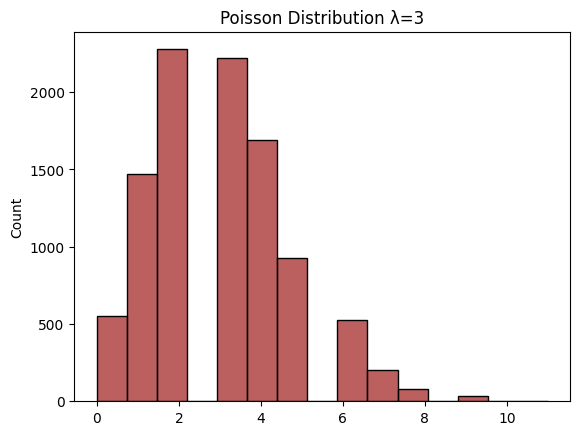

In [10]:
# Poisson Distribution (λ=3)
key, subkey = jax.random.split(key)
poisson_samples = jax.random.poisson(subkey, lam=3.0, shape=(num_samples,))
sns.histplot(poisson_samples, bins=15, kde=False, color='brown')
plt.title("Poisson Distribution λ=3")
plt.show()
